# How many of these stars are variable?

That's the big question. 
In our analysis of periodic variability, we found that 132/664 objects were periodic:

    ONC:  (336 objects inspected)
    78 (23.2%)

    NGC 1333: (103 objects inspected)
    29 (28.2%)

    IC 348: (225 objects inspected)
    25 (11.1%)

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from wuvars.data.photometry import load_wserv_v2, group_wserv_v2
from wuvars.data.spreadsheet import load_wserv_v2 as load_spread

In [4]:
# load up the inspection spreadsheets
spreadsheet_dir = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/analysis/prototypes"
period_sheet_ic = pd.read_excel(
    os.path.join(spreadsheet_dir, "IC_source_properties_periods_inspected.xlsx")
)
period_sheet_onc = pd.read_excel(
    os.path.join(spreadsheet_dir, "ONC_source_properties_periods_inspected.xlsx")
)
period_sheet_ngc = pd.read_excel(
    os.path.join(spreadsheet_dir, "NGC_source_properties_periods_inspected.xlsx")
)

spread_onc = load_spread(5)
spread_ngc = load_spread(7)
spread_ic = load_spread(8)

flags = ['Y', 'Yw', 'N', 'YfY', '?fY', 'YfYw', '?fYw', "YfN", "?fN"]
periodic_flags = [flag for flag in flags if flag[-1] in ('Y', 'w')]
print(periodic_flags)

np.sum(np.in1d(period_sheet_ic['Periodic?'], periodic_flags))

['Y', 'Yw', 'YfY', '?fY', 'YfYw', '?fYw']


25

In [5]:
lowmass_spread_onc = spread_onc.loc[period_sheet_onc["SOURCEID"].values]
# period_sheet_onc["SOURCEID"].values
# spread_onc.loc[44199508443140]

lowmass_spread_ngc = spread_ngc.loc[period_sheet_ngc["SOURCEID"].values]
lowmass_spread_ic = spread_ic.loc[period_sheet_ic["SOURCEID"].values]


In [6]:
# What reduced chisq and Stetson indices do these correspond to?

periodic_onc = period_sheet_onc[np.in1d(period_sheet_onc['Periodic?'], periodic_flags)]

periodic_ngc = period_sheet_ngc[np.in1d(period_sheet_ngc['Periodic?'], periodic_flags)]

periodic_ic = period_sheet_ic[np.in1d(period_sheet_ic['Periodic?'], periodic_flags)]

In [7]:
periodic_spread_onc = spread_onc.loc[periodic_onc["SOURCEID"].values]
periodic_spread_ngc = spread_ngc.loc[periodic_ngc["SOURCEID"].values]
periodic_spread_ic = spread_ic.loc[periodic_ic["SOURCEID"].values]


Text(0, 0.5, 'Stetson (JHK)')

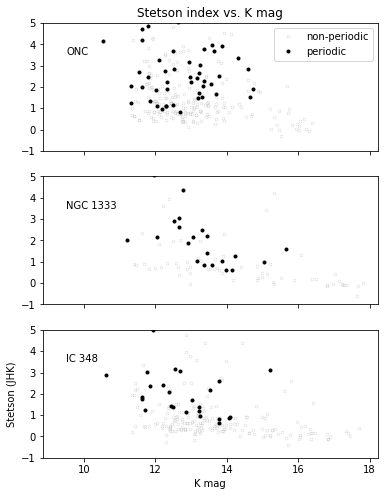

In [38]:
fig = plt.figure(figsize=(6,8))
ax_1 = plt.subplot(311)


plt.plot(period_sheet_onc['K_mag'], period_sheet_onc['Stetson_JHK'], 'wo', mec='k', mew=0.25, ms=3, alpha=0.3, label='non-periodic')
plt.plot(periodic_onc['K_mag'], periodic_onc['Stetson_JHK'], 'k.', label='periodic')


plt.setp(plt.gca().get_xticklabels(), visible=False)
plt.text(9.5, 3.5, "ONC")
plt.legend()
plt.title("Stetson index vs. K mag")

plt.subplot(312, sharex=ax_1, sharey=ax_1)

plt.plot(period_sheet_ngc['K_mag'], period_sheet_ngc['Stetson_JHK'], 'wo', mec='k', mew=0.25, ms=3, alpha=0.3)
plt.plot(periodic_ngc['K_mag'], periodic_ngc['Stetson_JHK'], 'k.')
plt.setp(plt.gca().get_xticklabels(), visible=False)
plt.text(9.5, 3.5, "NGC 1333")

plt.subplot(313, sharex=ax_1, sharey=ax_1)

plt.plot(period_sheet_ic['K_mag'], period_sheet_ic['Stetson_JHK'], 'wo', mec='k', mew=0.25, ms=3, alpha=0.3)
plt.plot(periodic_ic['K_mag'], periodic_ic['Stetson_JHK'], 'k.')
plt.ylim(-1, 5)
plt.text(9.5, 3.5, "IC 348")

plt.xlabel("K mag")
plt.ylabel("Stetson (JHK)")


In [9]:
print(min(periodic_onc['Stetson_JHK']))
print(min(periodic_ngc['Stetson_JHK']))
print(min(periodic_ic['Stetson_JHK']))

0.838206760467044
0.599990220939588
0.633443096883935


Text(0, 0.5, 'Stetson (JHK)')

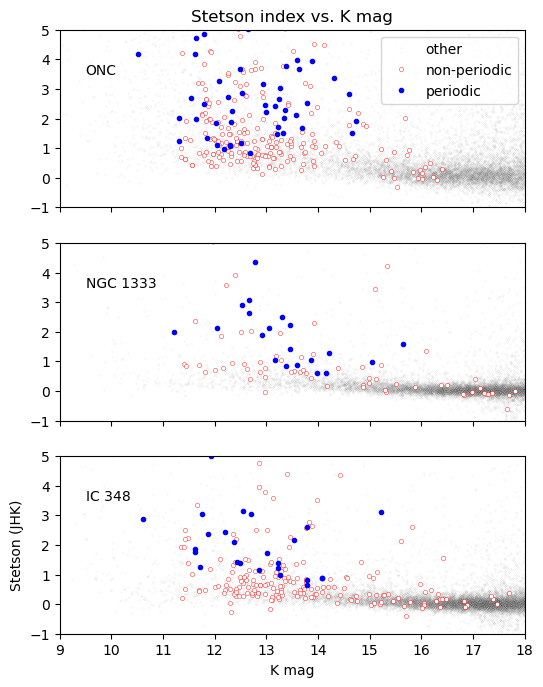

In [140]:
fig = plt.figure(figsize=(6,8), dpi=100)
ax_1 = plt.subplot(311)


plt.plot(spread_onc['median']['KAPERMAG3'], spread_onc['variability']['Stetson_JHK'], 'wo', mec='k', mew=0.25, ms=1, alpha=0.1, label='other')
plt.plot(period_sheet_onc['K_mag'], period_sheet_onc['Stetson_JHK'], 'wo', mec='r', mew=0.3, ms=3, alpha=1, label='non-periodic')
plt.plot(periodic_onc['K_mag'], periodic_onc['Stetson_JHK'], 'b.', label='periodic')


plt.setp(plt.gca().get_xticklabels(), visible=False)
plt.text(9.5, 3.5, "ONC")
plt.legend(loc='upper right')
plt.title("Stetson index vs. K mag")

plt.subplot(312, sharex=ax_1, sharey=ax_1)

plt.plot(spread_ngc['median']['KAPERMAG3'], spread_ngc['variability']['Stetson_JHK'], 'wo', mec='k', mew=0.25, ms=1, alpha=0.1, label='other')
plt.plot(period_sheet_ngc['K_mag'], period_sheet_ngc['Stetson_JHK'], 'wo', mec='r', mew=0.3, ms=3, alpha=1, label='non-periodic')
plt.plot(periodic_ngc['K_mag'], periodic_ngc['Stetson_JHK'], 'b.', label='periodic')
plt.setp(plt.gca().get_xticklabels(), visible=False)
plt.text(9.5, 3.5, "NGC 1333")

plt.subplot(313, sharex=ax_1, sharey=ax_1)

plt.plot(spread_ic['median']['KAPERMAG3'], spread_ic['variability']['Stetson_JHK'], 'wo', mec='k', mew=0.25, ms=1, alpha=0.1, label='other')
plt.plot(period_sheet_ic['K_mag'], period_sheet_ic['Stetson_JHK'], 'wo', mec='r', mew=0.3, ms=3, alpha=1, label='non-periodic')
plt.plot(periodic_ic['K_mag'], periodic_ic['Stetson_JHK'], 'b.', label='periodic')

plt.ylim(-1, 5)
plt.text(9.5, 3.5, "IC 348")
plt.xlim(9,18)

plt.xlabel("K mag")
plt.ylabel("Stetson (JHK)")


In [ ]:
    plt.hist(
        spread_onc['variability']['Stetson_JHK'], 
        range=(-1, 5), 
        bins=6*3, 
        label='other', 
        density=True,
        fill=False,
        hatch='.',
        edgecolor='C0',
        lw=2,
    )
    plt.hist(
        period_sheet_onc['Stetson_JHK'],
        range=(-1, 5), 
        bins=6*3, 
        label='non-periodic', 
        density=True,
        fill=False,
        hatch='/',
        edgecolor='C1'
    )
    plt.hist(
        periodic_onc['Stetson_JHK'],
        range=(-1, 5), 
        bins=6*3, 
        label='periodic', 
        density=True,
        fill=False,
        hatch='\\',
        edgecolor='C2',
        lw=2,
    )

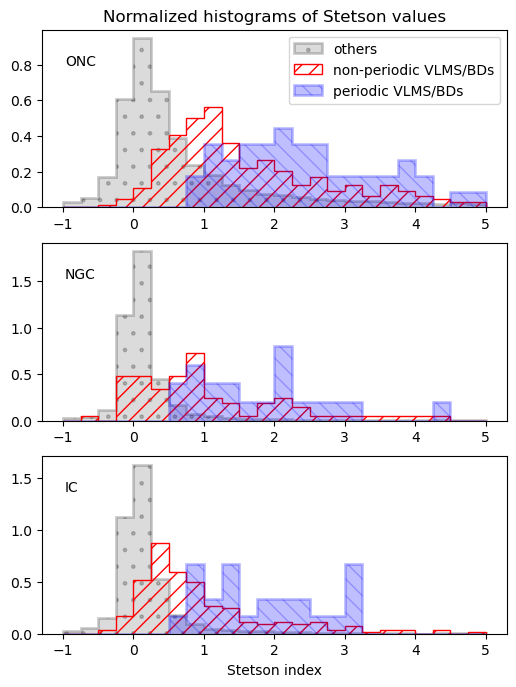

In [112]:
fig = plt.figure(figsize=(6,8), dpi=100)
ax_1 = plt.subplot(311)

period_sheet_dict = {
    'onc': period_sheet_onc,
    'ngc': period_sheet_ngc,
    'ic': period_sheet_ic
}
periodic_dict = {
    'onc': periodic_onc,
    'ngc': periodic_ngc,
    'ic': periodic_ic
}
spread_dict = {
    'onc': spread_onc,
    'ngc': spread_ngc,
    'ic': spread_ic
}
names = ['onc', 'ngc', 'ic']

for i in range(len(names)):
    
    plt.subplot(3, 1, i+1)

    plt.hist(
        spread_dict[names[i]]['variability']['Stetson_JHK'], 
        range=(-1, 5), 
        bins=6*4, 
        label='others', 
        density=True,
        fill=True,
        hatch='.',
        edgecolor='k',
        facecolor='0.3',
        lw=2,
        histtype='step',
        alpha=0.2        
    )
    plt.hist(
        period_sheet_dict[names[i]]['Stetson_JHK'],
        range=(-1, 5), 
        bins=6*4, 
        label='non-periodic VLMS/BDs', 
        density=True,
        fill=False,
        hatch='//',
        edgecolor='r',
        histtype='step',
    )
    plt.hist(
        periodic_dict[names[i]]['Stetson_JHK'],
        range=(-1, 5), 
        bins=6*4, 
        label='periodic VLMS/BDs',  
        density=True,
        fill=True,
        hatch='\\\\',
        edgecolor='b',
        facecolor='b',
        alpha=0.25,
        lw=2,
        histtype='step',
    )
    if i==0:
        plt.legend()
        plt.title("Normalized histograms of Stetson values")

        
    if i==2:
        plt.xlabel("Stetson index")
#     else:
#         plt.setp(plt.gca().get_xticklabels(), visible=False)


    plt.text(0.05, 0.8, names[i].upper(), transform=plt.gca().transAxes)
# plt.legend(loc='upper right')
# plt.title("Stetson index")

# plt.subplot(312, sharex=ax_1, sharey=ax_1)

# plt.plot(spread_ngc['median']['KAPERMAG3'], spread_ngc['variability']['Stetson_JHK'], 'wo', mec='k', mew=0.25, ms=1, alpha=0.1, label='other')
# plt.plot(period_sheet_ngc['K_mag'], period_sheet_ngc['Stetson_JHK'], 'wo', mec='r', mew=0.3, ms=3, alpha=1, label='non-periodic')
# plt.plot(periodic_ngc['K_mag'], periodic_ngc['Stetson_JHK'], 'b.', label='periodic')
# plt.setp(plt.gca().get_xticklabels(), visible=False)
# plt.text(9.5, 3.5, "NGC 1333")

# plt.subplot(313, sharex=ax_1, sharey=ax_1)

# plt.plot(spread_ic['median']['KAPERMAG3'], spread_ic['variability']['Stetson_JHK'], 'wo', mec='k', mew=0.25, ms=1, alpha=0.1, label='other')
# plt.plot(period_sheet_ic['K_mag'], period_sheet_ic['Stetson_JHK'], 'wo', mec='r', mew=0.3, ms=3, alpha=1, label='non-periodic')
# plt.plot(periodic_ic['K_mag'], periodic_ic['Stetson_JHK'], 'b.', label='periodic')

# plt.ylim(-1, 5)
# plt.text(9.5, 3.5, "IC 348")
# plt.xlim(9,18)

# plt.xlabel("K mag")
# plt.ylabel("Stetson (JHK)")


In [40]:
period_sheet_onc.columns

Index(['index', 'SOURCEID', 'shortname', 'A/S/C', 'RA_deg', 'DE_deg', 'J_mag',
       'H_mag', 'K_mag', 'Teff', 'SpT', 'Stetson_JHK', 'range_J', 'range_H',
       'range_K', 'period_J', 'per_amp_J', 'per_fap_J', 'period_H',
       'per_amp_H', 'per_fap_H', 'period_K', 'per_amp_K', 'per_fap_K',
       'Periodic?', 'Period', 'Amp', 'Color? (dK/dJ)'],
      dtype='object')

Text(0, 0.5, '$\\chi_\\nu^2$ (K)')

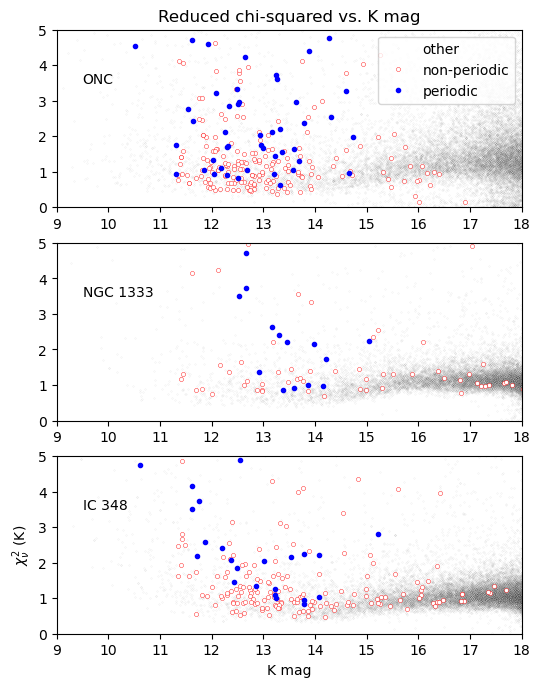

In [149]:
fig = plt.figure(figsize=(6,8), dpi=100)
ax_1 = plt.subplot(311)


plt.plot(spread_onc['median']['KAPERMAG3'], spread_onc['variability']['K_red_chisq'], 'wo', mec='k', mew=0.25, ms=1, alpha=0.1, label='other')
plt.plot(lowmass_spread_onc['median']['KAPERMAG3'], lowmass_spread_onc['variability']['K_red_chisq'], 'wo', mec='r', mew=0.3, ms=3, alpha=1, label='non-periodic')
plt.plot(periodic_spread_onc['median']['KAPERMAG3'], periodic_spread_onc['variability']['K_red_chisq'], 'b.', label='periodic')
# plt.plot(periodic_onc['K_mag'], periodic_onc['Stetson_JHK'], 'b.', label='periodic')
plt.text(9.5, 3.5, "ONC")

# plt.setp(plt.gca().get_xticklabels(), visible=False)
# plt.text(9.5, 3.5, "ONC")
plt.legend(loc='upper right')
plt.title("Reduced chi-squared vs. K mag")

plt.subplot(312, sharex=ax_1, sharey=ax_1)
plt.plot(spread_ngc['median']['KAPERMAG3'], spread_ngc['variability']['K_red_chisq'], 'wo', mec='k', mew=0.25, ms=1, alpha=0.1, label='other')
plt.plot(lowmass_spread_ngc['median']['KAPERMAG3'], lowmass_spread_ngc['variability']['K_red_chisq'], 'wo', mec='r', mew=0.3, ms=3, alpha=1, label='non-periodic')
plt.plot(periodic_spread_ngc['median']['KAPERMAG3'], periodic_spread_ngc['variability']['K_red_chisq'], 'b.', label='periodic')
# plt.plot(spread_ngc['median']['KAPERMAG3'], spread_ngc['variability']['Stetson_JHK'], 'wo', mec='k', mew=0.25, ms=1, alpha=0.1, label='other')
# plt.plot(period_sheet_ngc['K_mag'], period_sheet_ngc['Stetson_JHK'], 'wo', mec='r', mew=0.3, ms=3, alpha=1, label='non-periodic')
# plt.plot(periodic_ngc['K_mag'], periodic_ngc['Stetson_JHK'], 'b.', label='periodic')
# plt.setp(plt.gca().get_xticklabels(), visible=False)
plt.text(9.5, 3.5, "NGC 1333")

plt.subplot(313, sharex=ax_1, sharey=ax_1)
plt.plot(spread_ic['median']['KAPERMAG3'], spread_ic['variability']['K_red_chisq'], 'wo', mec='k', mew=0.25, ms=1, alpha=0.1, label='other')
plt.plot(lowmass_spread_ic['median']['KAPERMAG3'], lowmass_spread_ic['variability']['K_red_chisq'], 'wo', mec='r', mew=0.3, ms=3, alpha=1, label='non-periodic')
plt.plot(periodic_spread_ic['median']['KAPERMAG3'], periodic_spread_ic['variability']['K_red_chisq'], 'b.', label='periodic')

# plt.plot(spread_ic['median']['KAPERMAG3'], spread_ic['variability']['Stetson_JHK'], 'wo', mec='k', mew=0.25, ms=1, alpha=0.1, label='other')
# plt.plot(period_sheet_ic['K_mag'], period_sheet_ic['Stetson_JHK'], 'wo', mec='r', mew=0.3, ms=3, alpha=1, label='non-periodic')
# plt.plot(periodic_ic['K_mag'], periodic_ic['Stetson_JHK'], 'b.', label='periodic')

plt.ylim(0, 5)
plt.text(9.5, 3.5, "IC 348")
plt.xlim(9,18)

plt.xlabel("K mag")
plt.ylabel(r"$\chi_\nu^2$ (K)")


In [113]:
spread_onc['variability']

,J_red_chisq,H_red_chisq,K_red_chisq,Stetson_HK,Stetson_JK,Stetson_JH,Stetson_JHK
SOURCEID,,,,,,,
44199508443140,-0.000000,-0.000000,-0.000000,NaN,NaN,NaN,NaN
44199508443143,-0.000000,-0.000000,-0.000000,NaN,NaN,NaN,NaN
44199508443144,-0.000000,-0.000000,-0.000000,NaN,NaN,NaN,NaN
44199508443146,-0.000000,-0.000000,-0.000000,NaN,NaN,NaN,NaN
44199508443147,12.177577,7.560278,7.874746,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
44199508581970,-0.000000,NaN,8.915502,NaN,NaN,NaN,NaN
44199508581975,-0.000000,-0.000000,-0.000000,NaN,NaN,NaN,NaN
44199508582083,NaN,3.437600,1.708106,-0.255269,NaN,NaN,NaN


In [1]:
from wuvars.data import  quality_classes

onc_q = quality_classes.load_q(5)
onc_approved_q2 = onc_q.q2[approved_sources_onc]

%run ../bd_matching_v2
onc_match = match_onc()
ngc_match = match_ngc()
ic_match = match_ic()

NameError: name 'approved_sources_onc' is not defined

In [ ]:
# Tom is now 